In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

tf.random.set_seed(0)
np.random.seed(0)

In [54]:
train = pd.read_csv('/content/drive/MyDrive/Kaggle/facial_keypoints_detection/training.csv')
test = pd.read_csv('/content/drive/MyDrive/Kaggle/facial_keypoints_detection/test.csv')
lookid = pd.read_csv('/content/drive/MyDrive/Kaggle/facial_keypoints_detection/IdLookupTable.csv')

Take a look for a data

In [55]:
train.head().T

,0,1,2,3,4
left_eye_center_x,66.0336,64.3329,65.0571,65.2257,66.7253
left_eye_center_y,39.0023,34.9701,34.9096,37.2618,39.6213
right_eye_center_x,30.227,29.9493,30.9038,32.0231,32.2448
right_eye_center_y,36.4217,33.4487,34.9096,37.2618,38.042
left_eye_inner_corner_x,59.5821,58.8562,59.412,60.0033,58.5659
left_eye_inner_corner_y,39.6474,35.2743,36.321,39.1272,39.6213
left_eye_outer_corner_x,73.1303,70.7227,70.9844,72.3147,72.5159
left_eye_outer_corner_y,39.97,36.1872,36.321,38.381,39.8845
right_eye_inner_corner_x,36.3566,36.0347,37.6781,37.6186,36.9824
right_eye_inner_corner_y,37.3894,34.3615,36.321,38.7541,39.0949


Check if there has null data.

In [56]:
train.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

There are lots of missing data in eye, eyebrow, and mouth data, lets take few images to decide how to deal with it.

In [57]:
# image column is bunch of string, lets seperate it and make it list.
img = []
for i in range(7049):
  image = train.loc[i, 'Image'].split(' ')
  image = [x for x in image]
  img.append(image)

In [58]:
image_data = np.array(img, dtype = 'float')

In [59]:
image_data.reshape(-1, 96, 96, 1)
image_data.shape

(7049, 9216)

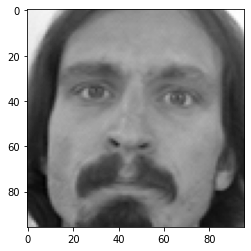

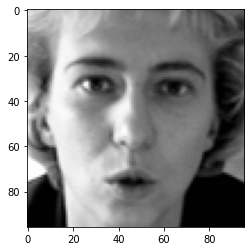

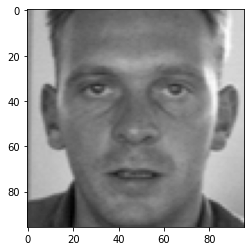

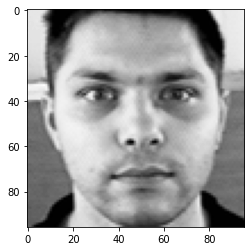

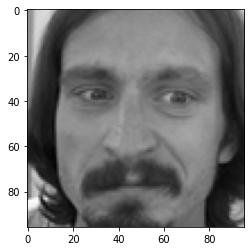

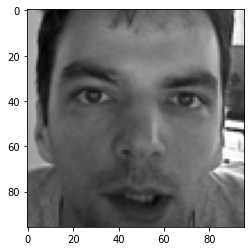

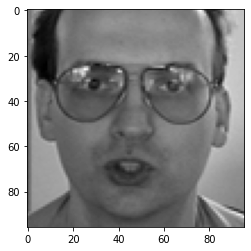

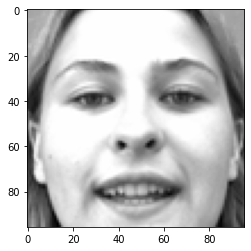

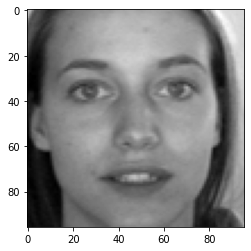

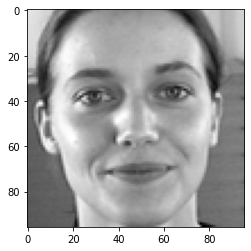

In [60]:
for i in range(10):
  plt.imshow(image_data[i].reshape(96,96), cmap='gray')
  plt.show()

All people are face to the camera in first 10 images, and their eyes are at similar location, so just use ffill or bfill to fill null feature.

In [61]:
train_data = train.copy()
train_data = train_data.fillna(method='ffill')

Let's take a look again to check is there have a null data

In [62]:
train_data.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [63]:
y = train_data.drop('Image', axis = 1)
y.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,right_eye_outer_corner_x,right_eye_outer_corner_y,left_eyebrow_inner_end_x,left_eyebrow_inner_end_y,left_eyebrow_outer_end_x,left_eyebrow_outer_end_y,right_eyebrow_inner_end_x,right_eyebrow_inner_end_y,right_eyebrow_outer_end_x,right_eyebrow_outer_end_y,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,23.452872,37.389402,56.953263,29.033648,80.227128,32.228138,40.227609,29.002322,16.356379,29.647471,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,24.472511,33.144443,53.987404,28.275949,78.634213,30.405923,42.728851,26.146043,16.865362,27.058860,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,24.976421,36.603221,55.742526,27.570947,78.887368,32.651621,42.193895,28.135453,16.791158,32.087116,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,25.307270,38.007903,56.433809,30.929864,77.910261,31.665725,41.671513,31.049990,20.458017,29.909343,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,22.506110,38.305237,57.249571,30.672177,77.762945,31.737247,38.035436,30.935382,15.925870,30.672177,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [64]:
X = image_data.reshape(-1, 96, 96, 1)
X /= 255
X.shape

(7049, 96, 96, 1)

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization

In [66]:
model = Sequential()

# Input Layer
model.add(InputLayer(input_shape=(96,96,1,)))
# 2 layers with 32 channels
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
# 2 layers with 64 channels
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
# 2 layers with 128 channels
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
# 2 layers with 256 channels
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
# 2 layers with 512 channels
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
# Dense layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
# Model Summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 96, 96, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 96, 96, 32)        9248      
_________________________________________________________________
batch_normalization_11 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 48, 48, 64)       

In [67]:
model.compile(loss = 'mse', optimizer='adam', metrics=['mse'])

In [68]:
model.fit(X, y, batch_size=50, epochs=50, validation_split=0.2)

Epoch 1/50
113/113 [==============================] - 9s 67ms/step - loss: 245.1956 - mse: 245.1956 - val_loss: 709.5592 - val_mse: 709.5592
Epoch 2/50
113/113 [==============================] - 7s 65ms/step - loss: 19.6399 - mse: 19.6399 - val_loss: 73.5581 - val_mse: 73.5581
Epoch 3/50
113/113 [==============================] - 7s 65ms/step - loss: 16.3751 - mse: 16.3751 - val_loss: 29.9272 - val_mse: 29.9272
Epoch 4/50
113/113 [==============================] - 7s 65ms/step - loss: 14.8167 - mse: 14.8167 - val_loss: 15.0169 - val_mse: 15.0169
Epoch 5/50
113/113 [==============================] - 7s 64ms/step - loss: 12.3781 - mse: 12.3781 - val_loss: 4.9239 - val_mse: 4.9239
Epoch 6/50
113/113 [==============================] - 7s 63ms/step - loss: 14.0175 - mse: 14.0175 - val_loss: 8.0170 - val_mse: 8.0170
Epoch 7/50
113/113 [==============================] - 7s 63ms/step - loss: 10.3805 - mse: 10.3805 - val_loss: 4.1043 - val_mse: 4.1043
Epoch 8/50
113/113 [=======================

After training, lets handle test images

In [84]:
print(f"test have shape: {test.shape}")
test.head()

test have shape: (1783, 2)


,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [97]:
test_image = []
for i in range(test_img.shape[0]):
  image = test_img[i].split(' ')
  test_image.append(image)

In [111]:
test_image = np.array(test_image, dtype='float')
test_image.shape

(1783, 96, 96, 1)

In [112]:
test_image /= 255
test_image = test_image.reshape(-1, 96, 96, 1)
print(f"test_image shape:{test_image.shape}")

test_image shape:(1783, 96, 96, 1)


Take a look up test image

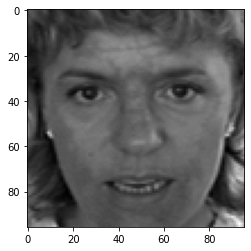

In [116]:
plt.imshow(test_image[1].reshape(96,96), cmap='gray')

In [117]:
prediction = model.predict(test_image)

In [165]:
prediction.shape

(1783, 30)

In [143]:
features = lookid.head(30).FeatureName.copy()
features = list(features)
features

['left_eye_center_x',
 'left_eye_center_y',
 'right_eye_center_x',
 'right_eye_center_y',
 'left_eye_inner_corner_x',
 'left_eye_inner_corner_y',
 'left_eye_outer_corner_x',
 'left_eye_outer_corner_y',
 'right_eye_inner_corner_x',
 'right_eye_inner_corner_y',
 'right_eye_outer_corner_x',
 'right_eye_outer_corner_y',
 'left_eyebrow_inner_end_x',
 'left_eyebrow_inner_end_y',
 'left_eyebrow_outer_end_x',
 'left_eyebrow_outer_end_y',
 'right_eyebrow_inner_end_x',
 'right_eyebrow_inner_end_y',
 'right_eyebrow_outer_end_x',
 'right_eyebrow_outer_end_y',
 'nose_tip_x',
 'nose_tip_y',
 'mouth_left_corner_x',
 'mouth_left_corner_y',
 'mouth_right_corner_x',
 'mouth_right_corner_y',
 'mouth_center_top_lip_x',
 'mouth_center_top_lip_y',
 'mouth_center_bottom_lip_x',
 'mouth_center_bottom_lip_y']

In [169]:
prediction_column = []
for i in lookid.itertuples():
  to_fill = prediction[i.ImageId - 1, features.index(i.FeatureName)]
  prediction_column.append(to_fill)

Put prediction result in lookid dataframe and save as csv file.


In [175]:
lookid = lookid.assign(Location = prediction_column)
lookid

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,65.710213
1,2,1,left_eye_center_y,37.612911
2,3,1,right_eye_center_x,29.337124
3,4,1,right_eye_center_y,36.218552
4,5,1,left_eye_inner_corner_x,60.083447
...,...,...,...,...
27119,27120,1783,right_eye_center_y,38.096577
27120,27121,1783,nose_tip_x,47.686432
27121,27122,1783,nose_tip_y,66.416672
27122,27123,1783,mouth_center_bottom_lip_x,47.290768


In [179]:
lookid.to_csv('/content/drive/MyDrive/Kaggle/facial_keypoints_detection/Lookid_Submission.csv')

Make a csv file to submiss.

In [182]:
submission = pd.DataFrame({'RowId': range(1, len(prediction_column)+1),
                           'Location': prediction_column})

submission = submission.set_index('RowId')

submission.to_csv('/content/drive/MyDrive/Kaggle/facial_keypoints_detection/Submission.csv')

Print some photo to see how is the result.

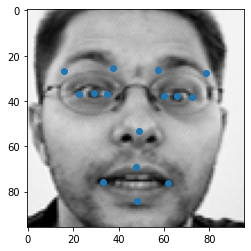

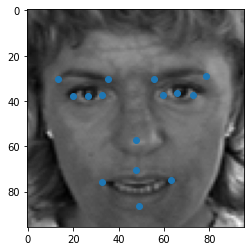

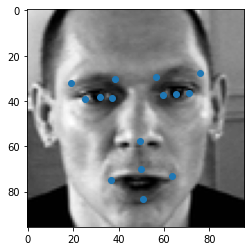

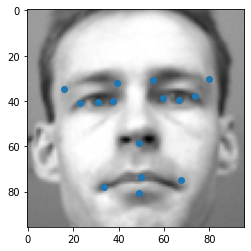

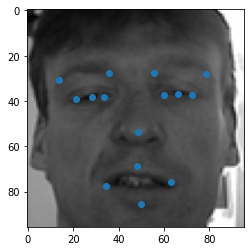

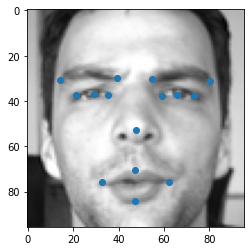

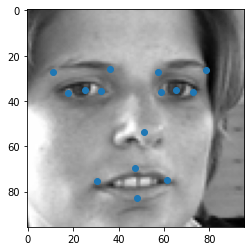

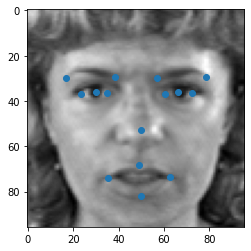

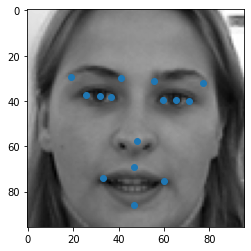

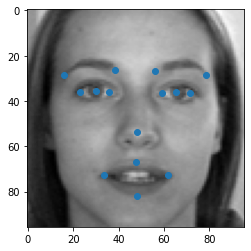

In [239]:
for i in range(10):
  x = lookid.query(f"ImageId == {i+1}")[lookid.query(f'ImageId == {i+1}').FeatureName.str.match('(.*_x)')].Location
  y = lookid.query(f"ImageId == {i+1}")[lookid.query(f'ImageId == {i+1}').FeatureName.str.match('(.*_y)')].Location
  plt.figure()
  plt.imshow(test_image_toshow[i], cmap='gray')
  plt.scatter(x, y)